#https://github.com/primaryobjects/voice-gender
#https://www.coursehero.com/tutors-problems/Python-Programming/29035794-Business-challengerequirement-Motion-Studios-is-the-largest-Radio-pro/
#https://www.kaggle.com/donghaoqiao/gender-recognition-by-voice-with-python
Business challenge/requirement

Motion Studios is the largest Radio production house in Europe.  Their total revenue $ 1B+. Company has launched a new reality show -"The Star RJ".  The show is about finding a new Radio Jockey who will be the star presenter on upcoming  shows. 



In first round participants have to upload their voice clip online and the clip will be evaluated by experts for selection into the next round. There is a separate team in the first round for evaluation of male and female voice. 



Response to the show is unprecedented and company is flooded with voice clips.



You as a ML expert  have to classify the voice as either male/female so that first level of filtration is quicker. 



Key issues

Voice sample are across accents



Considerations

The output from the pre-processed WAV files were saved into the CSV file



Data volume

-Approx 3000  records -file voice-classification.csv 



Fields in Data

• meanfreq: mean frequency (in kHz)

• sd: standard deviation of frequency

• median: median frequency (in kHz)

• Q25: first quantile (in kHz)

• Q75: third quantile (in kHz)

• IQR: interquantile range (in kHz)00.33

• skew: skewness (see note in specprop description)

• kurt: kurtosis (see note in specprop description)

• sp.ent: spectral entropy

• sfm: spectral flatness

• mode: mode frequency

• centroid: frequency centroid (see specprop)

• peakf: peak frequency (frequency with highest energy)

• meanfun: average of fundamental frequency measured across acoustic signal

• minfun: minimum fundamental frequency measured across acoustic signal

• maxfun: maximum fundamental frequency measured across acoustic signal

• meandom: average of dominant frequency measured across acoustic signal

• mindom: minimum of dominant frequency measured 

across acoustic signal

• maxdom: maximum of dominant frequency measured across acoustic signal

• dfrange: range of dominant frequency measured across acoustic signal

• modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

• label: male or female



Additional information

-NA



Business benefits

Since "The Star RJ" is a reality show, time to select candidates is very short. The whole success of the show and hence the profits depends upon quick and smooth execution.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
voice=pd.read_csv('voice-classification.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [22]:
voice.isnull().sum() 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [23]:
voice.shape

(3168, 21)

In [24]:
voice.dtypes.value_counts()

float64    21
dtype: int64

In [3]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [5]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


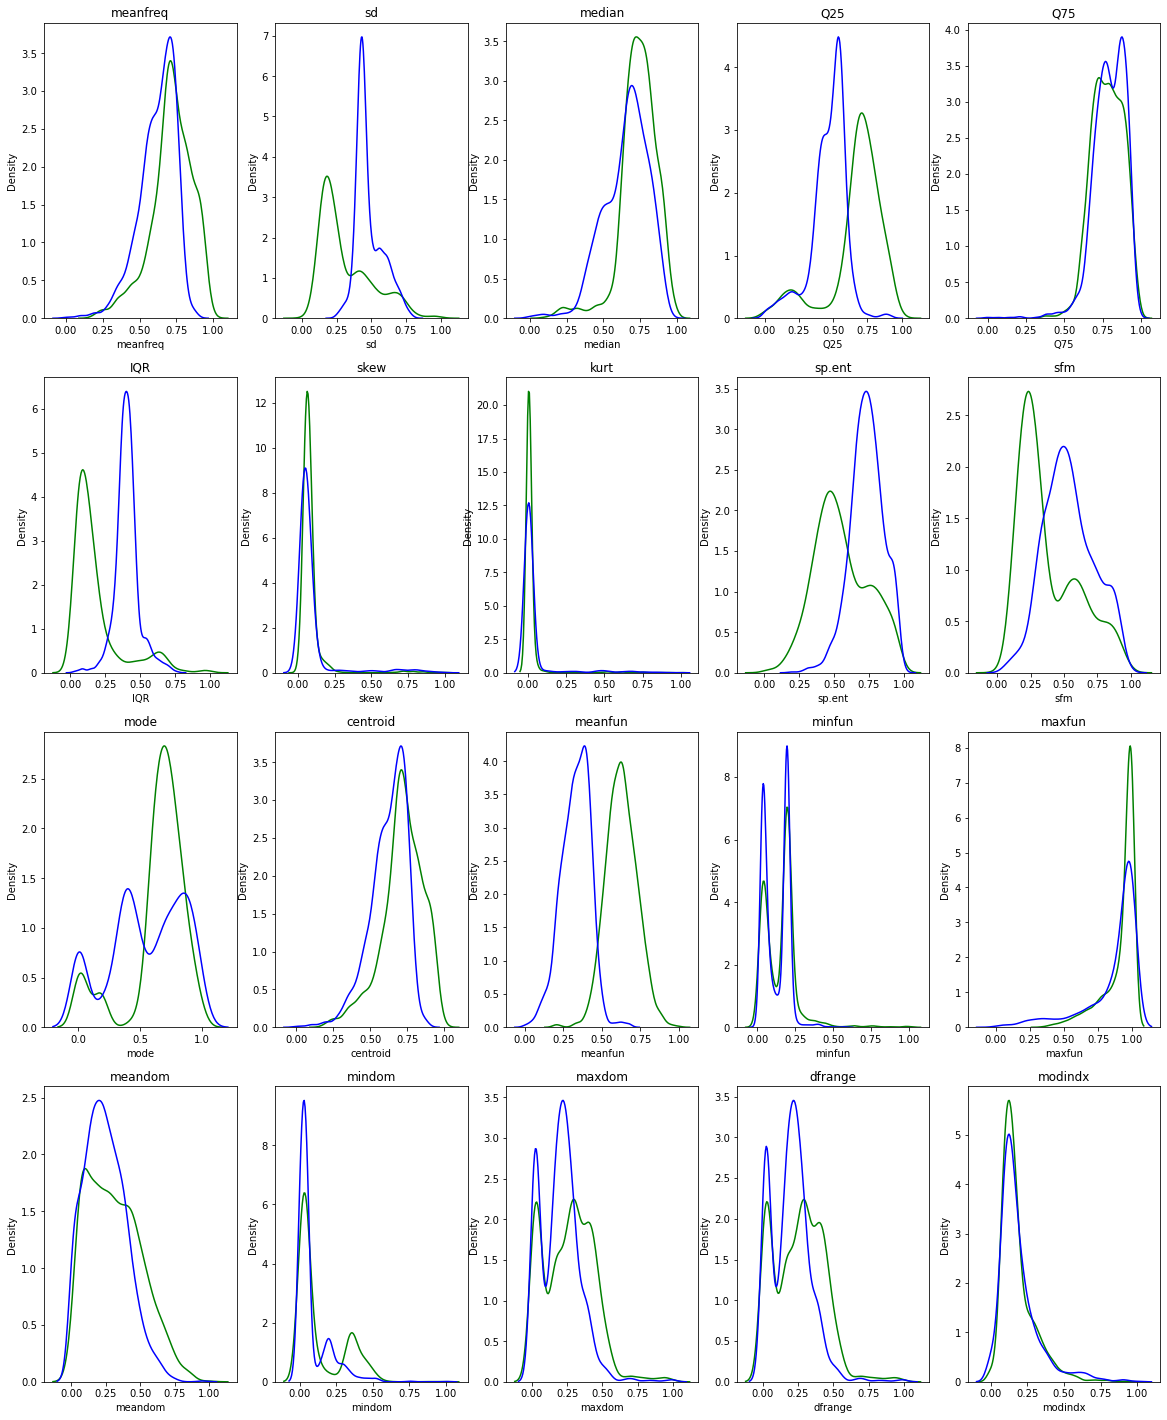

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(20,25))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import neural_network
import xgboost

In [43]:
train, test = train_test_split(voice, test_size=0.3)

In [44]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
539,0.425629,0.786001,0.510895,0.094090,0.699845,0.699460,0.692046,0.474279,0.311689,0.529362,...,0.425629,0.103896,0.037385,0.642670,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
2863,0.816802,0.215114,0.804486,0.799458,0.803864,0.066936,0.062657,0.004614,0.428272,0.274681,...,0.816802,0.503932,0.212213,0.990585,0.465541,0.040860,0.522873,0.522532,0.115738,0.0
2578,0.905323,0.136085,0.880893,0.882693,0.903694,0.077220,0.057188,0.003802,0.323878,0.148462,...,0.905323,0.762473,0.192118,0.963717,0.816817,0.040860,0.464975,0.464592,0.212401,0.0
1004,0.694323,0.407314,0.750785,0.550058,0.804337,0.326711,0.031143,0.001738,0.776885,0.422537,...,0.694323,0.346819,0.192118,0.990585,0.300572,0.040860,0.329878,0.329399,0.065783,1.0
2602,0.931577,0.156778,0.928529,0.865096,0.956764,0.146991,0.044866,0.002219,0.381956,0.115594,...,0.931577,0.665670,0.191170,0.999749,0.676230,0.040860,0.563617,0.563305,0.167033,0.0


In [45]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [46]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [47]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [60]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        print('===================',i,'==========================')
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' : in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        print(i, ' : in-sample Confusion Matrix: \n', confusion_matrix(y_train,y_pred))
        y_pred=model.predict(x_test)
        print('\n')
        print(i, ' : out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        print(i, ' : out-of-sample Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("\n\nHighest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [49]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [61]:
k=svm_kernel(x_train,y_train,x_test,y_test)

=================== rbf ==========================
rbf  : in-sample accuracy in SVM:  0.979702300405954
rbf  : in-sample Confusion Matrix: 
 [[1087   21]
 [  24 1085]]


rbf  : out-of-sample accuracy in SVM:  0.9768664563617245
rbf  : out-of-sample Confusion Matrix: 
 [[465  11]
 [ 11 464]]
=================== poly ==========================
poly  : in-sample accuracy in SVM:  0.9810554803788903
poly  : in-sample Confusion Matrix: 
 [[1089   19]
 [  23 1086]]


poly  : out-of-sample accuracy in SVM:  0.9800210304942166
poly  : out-of-sample Confusion Matrix: 
 [[468   8]
 [ 11 464]]
=================== linear ==========================
linear  : in-sample accuracy in SVM:  0.975191700496166
linear  : in-sample Confusion Matrix: 
 [[1076   32]
 [  23 1086]]


linear  : out-of-sample accuracy in SVM:  0.9758149316508938
linear  : out-of-sample Confusion Matrix: 
 [[464  12]
 [ 11 464]]


Highest accuracy is 0.9800210304942166 occurs at poly kernel.


Lowest error is 0.016824395373291272 occurs at C=2.


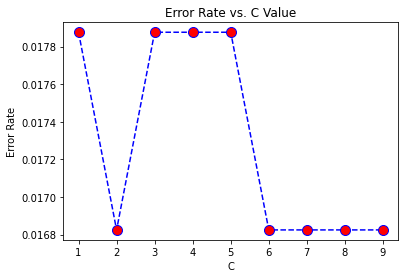

In [15]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [18]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9789    0.9872    0.9831       470
        male     0.9874    0.9792    0.9833       481

    accuracy                         0.9832       951
   macro avg     0.9832    0.9832    0.9832       951
weighted avg     0.9832    0.9832    0.9832       951



In [19]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9711321605773567
rbf  out-of-sample accuracy in SVM:  0.9800210304942166
poly  in-sample accuracy in SVM:  0.9657194406856112
poly  out-of-sample accuracy in SVM:  0.9810725552050473
linear  in-sample accuracy in SVM:  0.9621109607577808
linear  out-of-sample accuracy in SVM:  0.9737118822292324
Highest accuracy is 0.9810725552050473 occurs at poly kernel.


Lowest error is 0.017875920084121977 occurs at C=2.


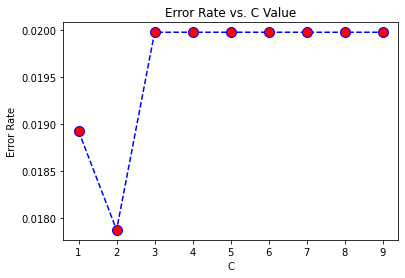

In [20]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [21]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9892    0.9745    0.9818       470
        male     0.9754    0.9896    0.9825       481

    accuracy                         0.9821       951
   macro avg     0.9823    0.9820    0.9821       951
weighted avg     0.9822    0.9821    0.9821       951

